In [3]:
#importing python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Uploading data(csv file)

df=pd.read_csv(r'Sales Data.csv', encoding='unicode_escape')

In [7]:
#checking number of rows and number of columns

df.shape

(11251, 15)

In [8]:
#top 5 values

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
#checking dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Data Cleaning

In [11]:
#drop blank column
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [12]:
#checking for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(11239, 13)

In [16]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
#changing data type of 'Amount'column from float64 to int

df['Amount']=df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int64')

In [19]:
#Description of the dataframe like mean, mode, median
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [20]:
#Description for specific column
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

#### Gender

In [23]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

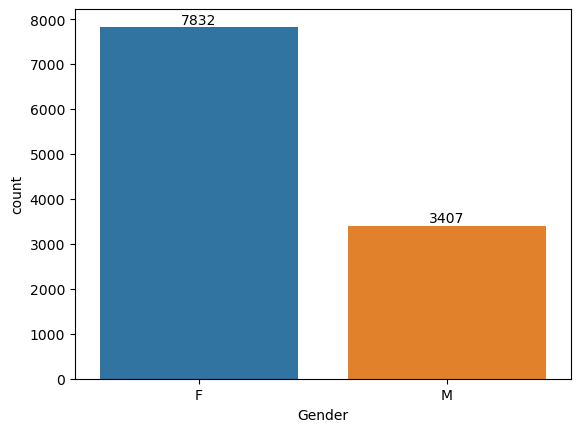

In [24]:
# plotting a bar chart for Gender and it's count

ax=sns.countplot(x='Gender',hue='Gender',data=df)

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [25]:
salesdata=df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [26]:
salesdata

,Gender,Amount
0,F,74335853
1,M,31913276


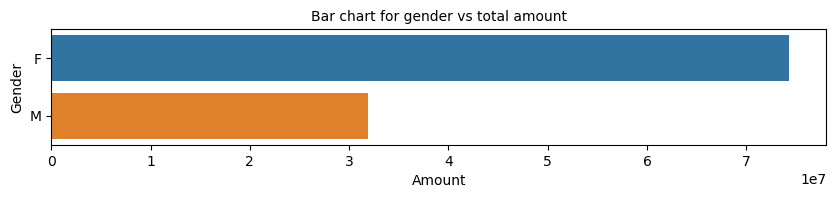

In [27]:
# plotting a bar chart for gender vs total amount

plt.figure(figsize=(10,1.5))
plt.title('Bar chart for gender vs total amount', fontsize=10)
sns.barplot(x='Amount',y='Gender',data=salesdata, hue='Gender')
plt.show()

*The visualizations indicate that females not only represent a larger proportion of buyers but also tend to spend more compared to males.*

#### Age

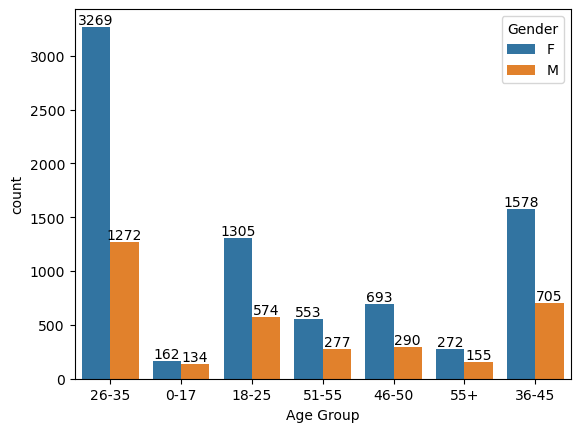

In [30]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')

for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

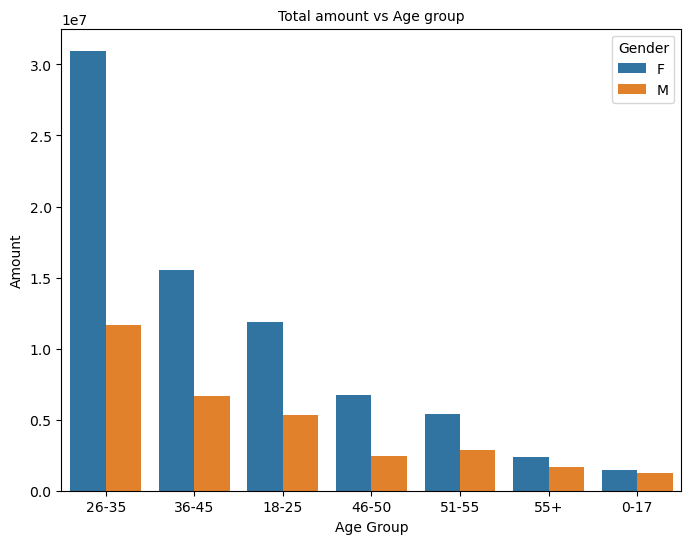

In [31]:
# Total Amount vs Age Group

plt.figure(figsize=(8,6))
plt.title('Total amount vs Age group', fontsize=10)
salesage=df.groupby(['Age Group','Gender'],as_index=False)['Amount'].sum().sort_values(ascending=False,by='Amount')
sns.barplot(x='Age Group',y='Amount',hue='Gender',data=salesage)
plt.show()

In [32]:
salesage

,Age Group,Gender,Amount
4,26-35,F,30963953
6,36-45,F,15509956
2,18-25,F,11887003
5,26-35,M,11649489
8,46-50,F,6743393
7,36-45,M,6635038
10,51-55,F,5385208
3,18-25,M,5353729
11,51-55,M,2876269
9,46-50,M,2464451


*The graphs highlight that the majority of buyers fall within the 26–35 age group, with females being the dominant demographic in this segment.*


#### State

In [35]:
#Total number of orders from top 10 states

sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(ascending=False,by='Orders').head(10)

In [36]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


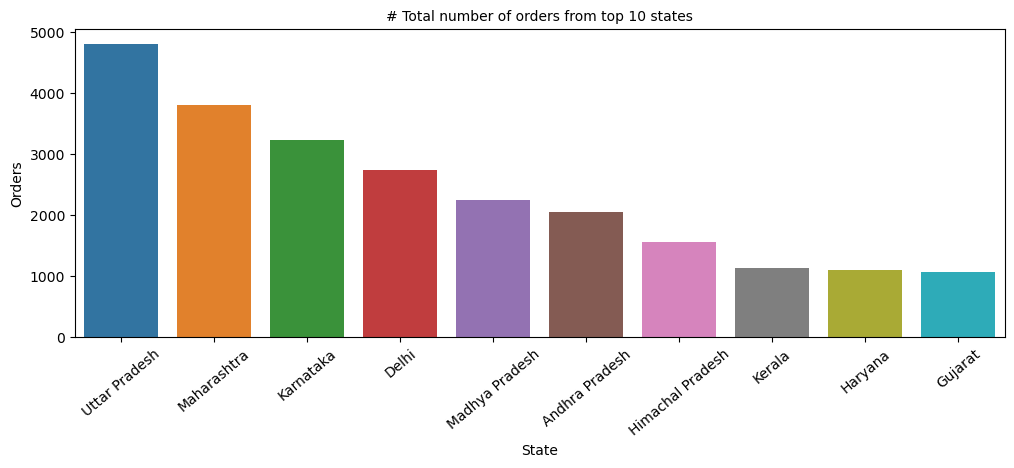

In [37]:
plt.figure(figsize=(12,4))
plt.title('# Total number of orders from top 10 states', fontsize=10)
plt.xticks(fontsize=10,rotation=40)
sns.barplot(data=sales_state,x='State',y='Orders',hue='State')

plt.show()

In [38]:
#Total sales from top 10 states
amount_states=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(ascending=False,by='Amount').head(10)

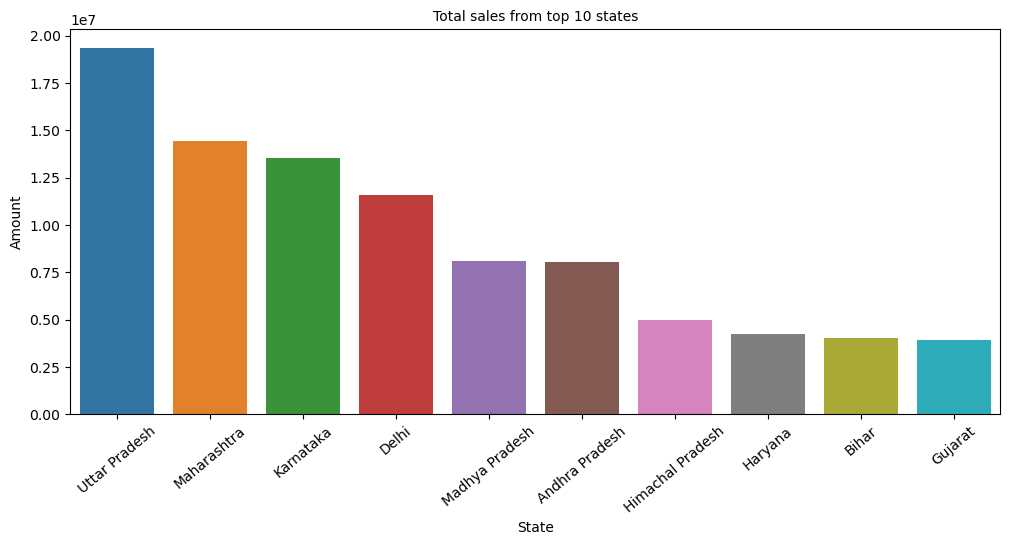

In [39]:
plt.figure(figsize=(12,5))
plt.title('Total sales from top 10 states',fontsize=10)
plt.xticks(fontsize=10,rotation=40)
sns.barplot(data=amount_states,x='State',y='Amount',hue='State')

plt.show()

*Uttar Pradesh, Maharashtra, and Karnataka emerge as the top-performing states in terms of both order volume and total sales*

#### Marital Satus

In [42]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

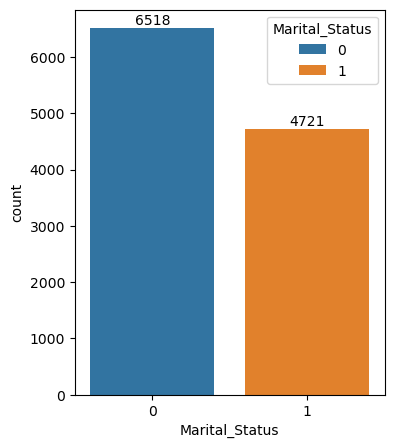

In [43]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x='Marital_Status',data=df,hue='Marital_Status')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [44]:
mar_status=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(ascending=False,by='Amount')

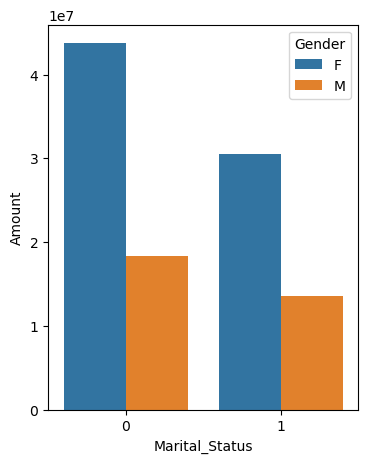

In [45]:
plt.figure(figsize=(4,5))
sns.barplot(data=mar_status,x='Marital_Status',y='Amount',hue='Gender')
plt.show()

*Married women represent the largest buyer group with the highest spending levels.*

#### Occupation

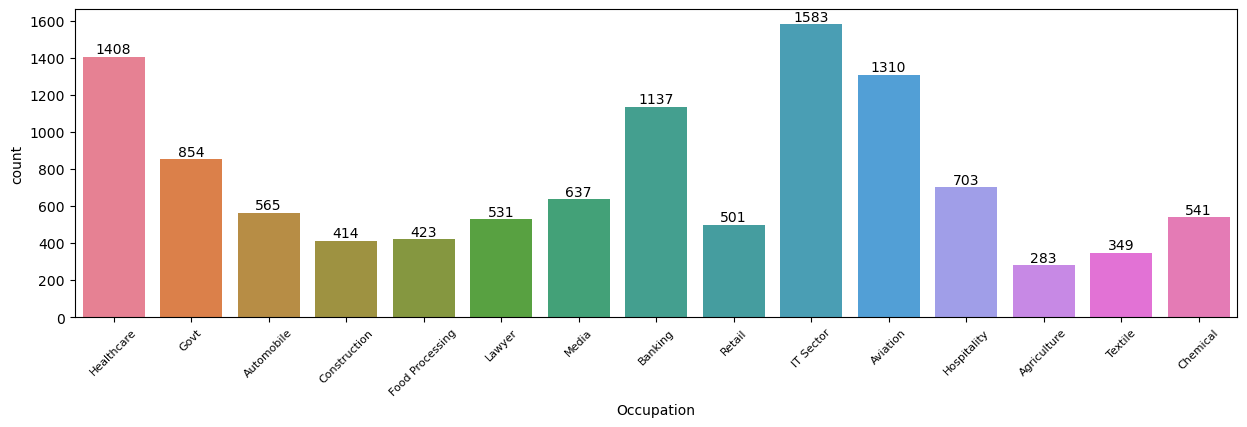

In [48]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45,size=8)
ax=sns.countplot(x='Occupation', data=df,hue='Occupation')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [49]:
sector_amount=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

In [50]:
sector_amount

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


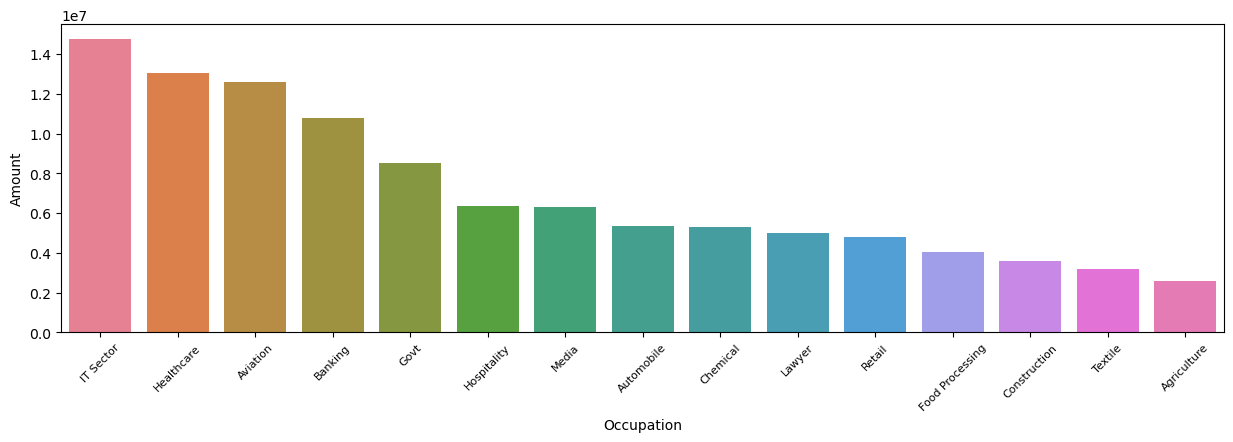

In [51]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45,size=8)
sns.barplot(x='Occupation',y='Amount',data=sector_amount, hue='Occupation')
plt.show()


*From the analysis, it’s evident that most buyers are employed in IT, Healthcare, and Aviation, highlighting the strong consumer behavior among professionals in these fields*

#### Product Category

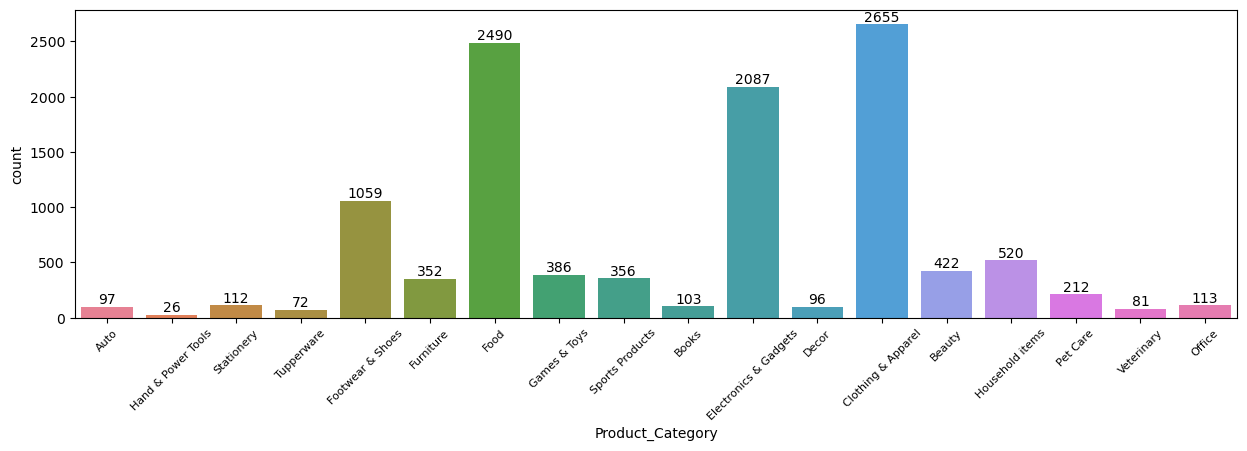

In [54]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45,size=8)
ax=sns.countplot(x='Product_Category', data=df,hue='Product_Category')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

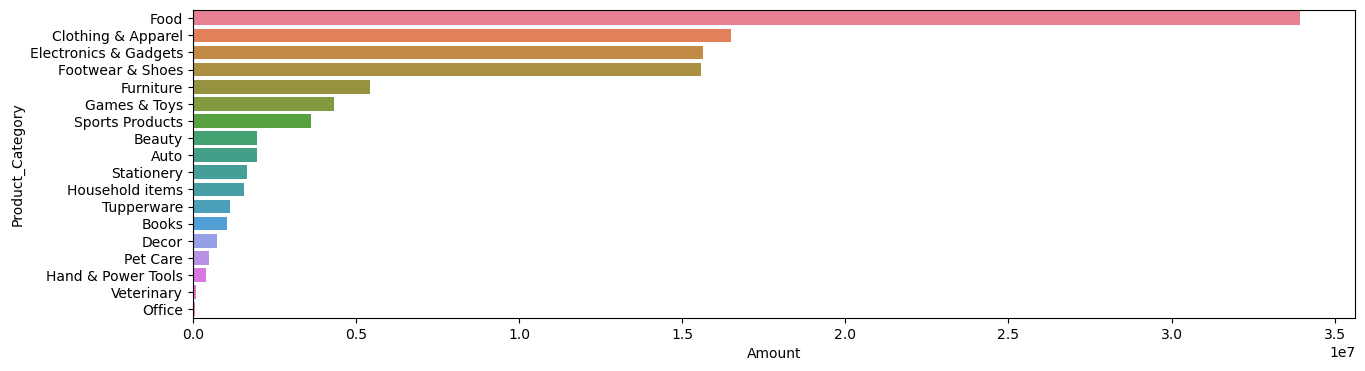

In [55]:

prd_cat=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(15,4))
sns.barplot(x='Amount',y='Product_Category',data=prd_cat, hue='Product_Category')
plt.show()


*The graphs indicate that the majority of products sold belong to the Food, Clothing, and Electronics categories*

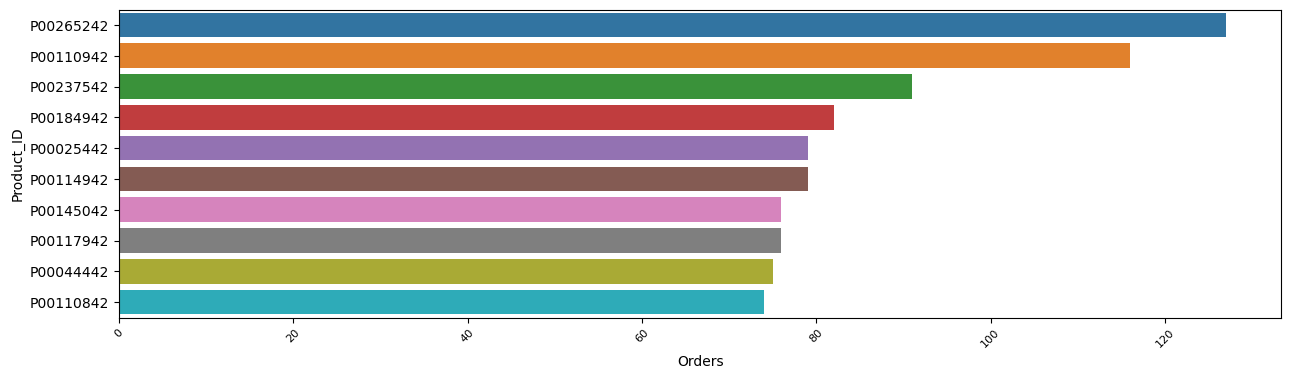

In [57]:
# top 10 most sold products

prd_id=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(15,4))
plt.xticks(rotation=45,size=8)
sns.barplot(x='Orders',y='Product_ID',data=prd_id, hue='Product_ID')
plt.show()


### Conclusion

*The analysis highlights that the most active and high-spending customer segment comprises married women aged 26–35, predominantly from Uttar Pradesh, Maharashtra, and Karnataka, and working in IT, Healthcare, or Aviation sectors. This group significantly contributes to overall sales, showing a clear preference for Food, Clothing, and Electronics products. Their strong engagement and purchasing behavior make them a key target demographic for marketing and sales strategies*